1. Introduction

In [ ]:
# Goal: Build and evaluate a CNN to classify images into 10 categories (CIFAR-10 dataset)
# Libraries: TensorFlow, Keras, numpy, matplotlib

2. Import Libraries

In [2]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 1.7 MB/s eta 0:03:44
   ---------------------------------------- 0.8/376.0 MB 1.7 MB/s eta 0:03:44
   ---------------------------------------- 1.3/376.0 MB 1.8 MB/s eta 0:03:33
   ---------------------------------------- 1.6/376.0 MB 1.8 MB/s eta 0:03:30
   ---------------------------------------- 2.1/376.0 MB 2.0 MB/s eta 0:03:11
   ---------------------------------------- 2.6/376.0 MB 2.1 MB/s eta 0:03:01
   ---------------------------------------- 3.4/376.0 MB 2.3 MB/s eta 0:02:45
   ---------------------------------------- 4.2/376.0 MB 2.5 MB/s eta 0:02:31
   ---------------------------------------- 4.5/376.0 MB 2.5 MB/s eta 0:02:30
    --------------------------------------- 5.2/376.0 MB 2.5 MB/s eta 0:02:32
    --------------------------------------- 6.0/376.0 MB 2.6 MB/s eta 0:02:24


3. Load Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 35s 0us/step


In [4]:
# Normalize pixel values (0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Check shapes
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


4. Visualize Sample Images

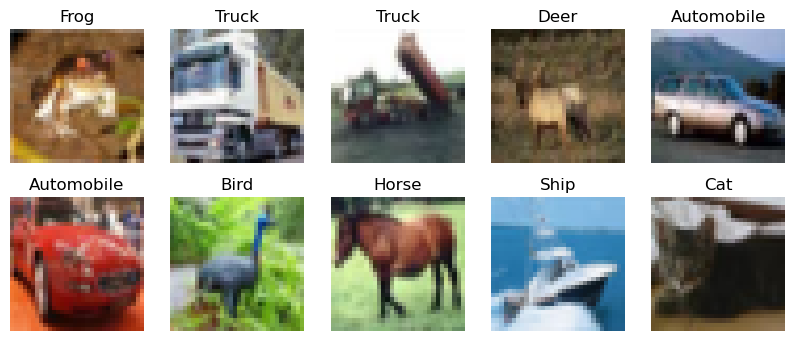

In [6]:
class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

5. Data Augmentation

In [7]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

6. Build CNN Model

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

C:\Users\Cooper\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

7. Compile Model

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

8. Train Model with Augmentation

In [10]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20


C:\Users\Cooper\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.2454 - loss: 1.9942 - val_accuracy: 0.4796 - val_loss: 1.3987
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.4401 - loss: 1.5309 - val_accuracy: 0.5158 - val_loss: 1.3214
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5050 - loss: 1.3872 - val_accuracy: 0.6070 - val_loss: 1.1099
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.5450 - loss: 1.2888 - val_accuracy: 0.6201 - val_loss: 1.0808
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.5643 - loss: 1.2205 - val_accuracy: 0.6393 - val_loss: 1.0157
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.5825 - loss: 1.1799 - val_accuracy: 0.6558 - val_loss: 0.9884
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6000 - loss: 1.1337 - val_accuracy: 0.6768 - val_loss: 0.9410
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.6193 - loss: 1.0964 - val_accurac

9. Evaluate Model

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.2f}")

313/313 - 1s - 4ms/step - accuracy: 0.7286 - loss: 0.7967

Test Accuracy: 0.73


10. Plot Training Curves

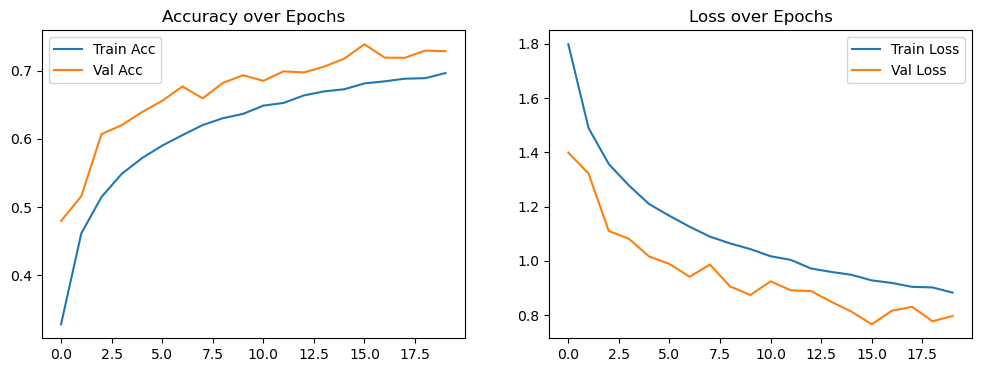

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

11. Confusion Matrix & Classification Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


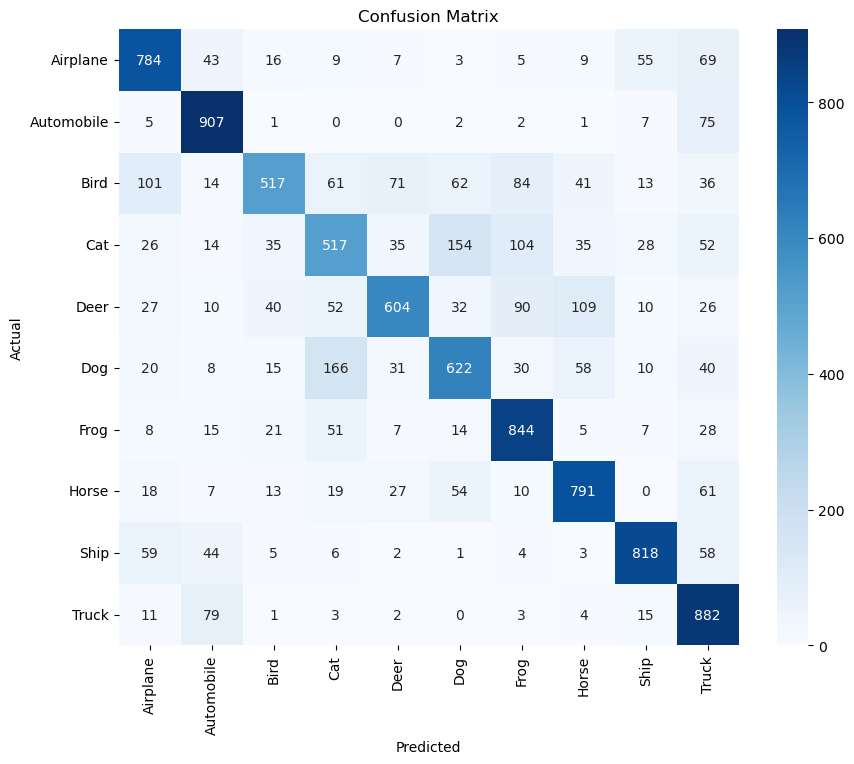

              precision    recall  f1-score   support

    Airplane       0.74      0.78      0.76      1000
  Automobile       0.79      0.91      0.85      1000
        Bird       0.78      0.52      0.62      1000
         Cat       0.58      0.52      0.55      1000
        Deer       0.77      0.60      0.68      1000
         Dog       0.66      0.62      0.64      1000
        Frog       0.72      0.84      0.78      1000
       Horse       0.75      0.79      0.77      1000
        Ship       0.85      0.82      0.83      1000
       Truck       0.66      0.88      0.76      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000



In [13]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred, target_names=class_names))